# Introduction
- This notebook explores the tweepy package to access twitter's API to retreive tweets.
- It also uses VaderSentiment as well as TextBlob pacakages to perform sentiment analysis on the preprocessed tweets

In [2]:
import tweepy

In [3]:
import os

# Setting up the Twitter credentials

In [4]:
consumer_key = os.getenv("TWITTER_API_KEY")
consumer_secret = os.getenv("TWITTER_API_SECRET")
bearer_token = os.getenv("TWITTER_BEARER_TOKEN")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_secret = os.getenv("TWITTER_ACCESS_SECRET")


In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [94]:
public_tweets = api.home_timeline(tweet_mode="compat")
for tweet in public_tweets:
    print(tweet.text)

2020 #Pandemic led many orgs to shift workloads to #Cloud. A common way to do that is through a "lift and shift" mi… https://t.co/W6Ni6RqYNs
I have questions https://t.co/W8wElflnB5
Turn #ODSCEast into a Mini-Bootcamp with a Pandas pre-conference live training in January, pre-conference on-demand… https://t.co/9sTeiPsRhw
It really does seem like it's going to be a race between how fast the new variant spreads and how quickly we can ge… https://t.co/lVHjck3P5V
We're hiring a fact checker for my new podcast/column over at @nytopinion (and possibly some other shows!). At leas… https://t.co/8pUiiYsS36
RT @SoVeryBritish: “Ah, well” - Translation: Everything’s as bad as can be expected.
Everything is at stake in Georgia. Be a part of this fight and help @ReverendWarnock and @ossoff cross the finish l… https://t.co/kYc2INKx6d
Time Complexity: How to measure the efficiency of #Algorithms #KDN https://t.co/3ZVO3EB9bO
"An Appeal for Rapid Antigen Tests for #COVID19"

Read the expert letter co-si

In [95]:
tweets = api.search("Northeastern University",tweet_mode ="extended", lang="en",count=100)

In [96]:
type(tweets)

tweepy.models.SearchResults

In [124]:
for twt in tweets[:10]:
    print(twt.full_text)

In 2020, Northeastern University’s official news source, News@Northeastern, exceeded 7.7 million total page views, blowing away its previous record of 2.6 million in 2019.

https://t.co/Cgaz9QXqHI
RT @MiamiBK: ‼️Special Invite‼️
#SaveTheDate Thurs, Jan 7 

Program hosted by the @Northeastern University on 
“The Future Thinking for a W…
RT @TimeToVoteGA: Georgia #Runoff Voters:  Are you voting tomorrow? Already voted? Either way, you can assist research by @Northeastern Uni…
Temporary COVID-19 Vaccinator position at Northeastern University. For complete details, please visit: https://t.co/UlksliXKzi
‼️Special Invite‼️
#SaveTheDate Thurs, Jan 7 

Program hosted by the @Northeastern University on 
“The Future Thinking for a World Re-imagined"

at 1:30 pm EST #US
at 6:30 pm GMT #UK

with special guests Sr. Jayanti &amp; Veronica McHugh via https://t.co/aDOlCdNoyT 
ID: 954 8358 2154 https://t.co/eJIn5ZYM67
"For me, I kind of saw it like, I need to step up. I need to be here and help these p

# Understanding the components within the _SearchResults_ object

In [125]:
for twt in tweets[:2]:
    print(dir(twt))
    print("== entities")
    print(twt.entities)
    print("== metadata")
    print(twt.metadata)
    print("== coordinates")
    print(twt.coordinates)
    print("== created_at")
    print(twt.created_at)
    print("== geo")
    print(twt.geo)
    print("== id")
    print(twt.id)
    
    print("== favorite_count")
    print(twt.favorite_count)
    
    print("== is_quote_status")
    print(twt.is_quote_status)
    
    print("== place")
    print(twt.place)
    
    print("== author")
    print(twt.author)
    
    print("== contributors")
    print(twt.contributors)
    
    print("== lang")
    print(twt.lang)
    
    print("== retweets")
    print(twt.retweets())    
    
    print("== retweet_count")
    print(twt.retweet_count)
    
    print("== retweeted")
    print(twt.retweeted)
    
    print("== user")
    print(twt.user.__dict__)
    
    print("== truncated")
    print(twt.truncated)
    
    print("== source")
    print(twt.source)
    
    print("== source_url")
    print(twt.source_url)
    
    print("== full_text")
    print(twt.full_text)
    
    break

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
== entities
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Cgaz9QXqHI', 'expanded_ur

# Using VaderSentiment to extract sentiment on raw tweet

In [99]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [100]:
analyzer = SentimentIntensityAnalyzer()

In [104]:
count = 0
for tweet in tweets:
    vs = analyzer.polarity_scores(tweet.full_text)
    print("{:-<65} {}".format(tweet.full_text, str(vs)))
    count += 1
    if count > 5:
        break

In 2020, Northeastern University’s official news source, News@Northeastern, exceeded 7.7 million total page views, blowing away its previous record of 2.6 million in 2019.

https://t.co/Cgaz9QXqHI {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
RT @MiamiBK: ‼️Special Invite‼️
#SaveTheDate Thurs, Jan 7 

Program hosted by the @Northeastern University on 
“The Future Thinking for a W… {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.1531}
RT @TimeToVoteGA: Georgia #Runoff Voters:  Are you voting tomorrow? Already voted? Either way, you can assist research by @Northeastern Uni… {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Temporary COVID-19 Vaccinator position at Northeastern University. For complete details, please visit: https://t.co/UlksliXKzi {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}
‼️Special Invite‼️
#SaveTheDate Thurs, Jan 7 

Program hosted by the @Northeastern University on 
“The Future Thinking for a World Re-imagined"

at 1:30 pm EST #US
at

In [109]:
len(tweets)

100

In [105]:
def get_vader_sentiment(txt):
    vs = analyzer.polarity_scores(txt)
    return vs

In [106]:
import pandas as pd
def parse_tweets_to_df(tweets_result):
    
    results_list = []
    for tweet in tweets_result:
        dict_ = {}
        dict_["tweet_txt"] = tweet.full_text
        dict_["enitities"] = tweet.entities
        dict_["created_at"] = tweet.created_at
        dict_["favorite_count"]= tweet.favorite_count
        dict_["retweet_count"]= tweet.retweet_count
        dict_["user"] = tweet.user.__dict__
        results_list.append(dict_)
    return pd.DataFrame(results_list)

In [108]:
df = parse_tweets_to_df(tweets)
df

,tweet_txt,enitities,created_at,favorite_count,retweet_count,user
0,"In 2020, Northeastern University’s official ne...","{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-04 20:49:00,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...
1,RT @MiamiBK: ‼️Special Invite‼️\n#SaveTheDate ...,"{'hashtags': [{'text': 'SaveTheDate', 'indices...",2021-01-04 20:37:50,0,1,{'_api': <tweepy.api.API object at 0x0000010FB...
2,RT @TimeToVoteGA: Georgia #Runoff Voters: Are...,"{'hashtags': [{'text': 'Runoff', 'indices': [2...",2021-01-04 20:37:40,0,3,{'_api': <tweepy.api.API object at 0x0000010FB...
3,Temporary COVID-19 Vaccinator position at Nort...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-04 20:30:19,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...
4,"‼️Special Invite‼️\n#SaveTheDate Thurs, Jan 7 ...","{'hashtags': [{'text': 'SaveTheDate', 'indices...",2021-01-04 20:30:07,2,1,{'_api': <tweepy.api.API object at 0x0000010FB...
...,...,...,...,...,...,...
95,Lifestyle forecasts for Northeastern Universit...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 12:24:13,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...
96,Northeastern University at sunrise and it's 31...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 12:23:05,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...
97,It's below freezing at Northeastern University...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 10:49:00,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...
98,"@BobHamley Yah he wasnt even invited, this is ...","{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 06:25:58,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...


In [188]:
import re
def clean_tweet(text):
    text = re.sub('@[A-Za-z0-9_]+:', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlinks
    text = re.sub('\n', ' ', text) 
    return text

In [189]:
df["clean_tweet"] = df["tweet_txt"].apply(clean_tweet)

In [190]:
df

,tweet_txt,enitities,created_at,favorite_count,retweet_count,user,clean_tweet
0,"In 2020, Northeastern University’s official ne...","{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-04 20:49:00,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...,"In 2020, Northeastern University’s official ne..."
1,RT @MiamiBK: ‼️Special Invite‼️\n#SaveTheDate ...,"{'hashtags': [{'text': 'SaveTheDate', 'indices...",2021-01-04 20:37:50,0,1,{'_api': <tweepy.api.API object at 0x0000010FB...,"‼️Special Invite‼️ SaveTheDate Thurs, Jan 7 ..."
2,RT @TimeToVoteGA: Georgia #Runoff Voters: Are...,"{'hashtags': [{'text': 'Runoff', 'indices': [2...",2021-01-04 20:37:40,0,3,{'_api': <tweepy.api.API object at 0x0000010FB...,Georgia Runoff Voters: Are you voting tomorro...
3,Temporary COVID-19 Vaccinator position at Nort...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-04 20:30:19,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...,Temporary COVID-19 Vaccinator position at Nort...
4,"‼️Special Invite‼️\n#SaveTheDate Thurs, Jan 7 ...","{'hashtags': [{'text': 'SaveTheDate', 'indices...",2021-01-04 20:30:07,2,1,{'_api': <tweepy.api.API object at 0x0000010FB...,"‼️Special Invite‼️ SaveTheDate Thurs, Jan 7 ..."
...,...,...,...,...,...,...,...
95,Lifestyle forecasts for Northeastern Universit...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 12:24:13,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...,Lifestyle forecasts for Northeastern Universit...
96,Northeastern University at sunrise and it's 31...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 12:23:05,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...,Northeastern University at sunrise and it's 31...
97,It's below freezing at Northeastern University...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 10:49:00,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...,It's below freezing at Northeastern University...
98,"@BobHamley Yah he wasnt even invited, this is ...","{'hashtags': [], 'symbols': [], 'user_mentions...",2021-01-01 06:25:58,0,0,{'_api': <tweepy.api.API object at 0x0000010FB...,"@BobHamley Yah he wasnt even invited, this is ..."


# VaderSentiment applied on cleaned tweets

In [191]:
df["clean_tweet"].apply(get_vader_sentiment)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...
4     {'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...
                            ...                        
95    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
96    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
97    {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...
98    {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...
99    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: clean_tweet, Length: 100, dtype: object

In [192]:
print(df["tweet_txt"].apply(get_vader_sentiment))

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
4     {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...
                            ...                        
95    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
96    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
97    {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...
98    {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...
99    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: tweet_txt, Length: 100, dtype: object


In [193]:
get_vader_sentiment("I am happy about the new job")

{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

The vaderSentiment package recommends that
- if compound score > 0.05 then positive
- if compound score < -0.05 then negative
- if in between then neutral

But we can use our own thresholds on top of the 

# Using TextBlob for sentiment analysis

In [81]:
from textblob import TextBlob

In [93]:
TextBlob("Hi! I am happy about the new job").sentiment

Sentiment(polarity=0.4681818181818182, subjectivity=0.7272727272727273)

In [92]:
TextBlob("Hi! I am happy about the new job").sentiment_assessments

Sentiment(polarity=0.4681818181818182, subjectivity=0.7272727272727273, assessments=[(['happy'], 0.8, 1.0, None), (['new'], 0.13636363636363635, 0.45454545454545453, None)])

In [194]:
def get_textblob_sentiment(txt):
    snt =  TextBlob(txt).sentiment
    return {"polarity" : snt.polarity, "subjectivity" : snt.subjectivity}

In [195]:
df["clean_tweet"].apply(get_textblob_sentiment)

0     {'polarity': -0.08333333333333333, 'subjectivi...
1              {'polarity': 0.0, 'subjectivity': 0.125}
2                {'polarity': 0.0, 'subjectivity': 0.0}
3                {'polarity': 0.1, 'subjectivity': 0.4}
4     {'polarity': 0.17857142857142858, 'subjectivit...
                            ...                        
95               {'polarity': 0.0, 'subjectivity': 0.0}
96               {'polarity': 0.0, 'subjectivity': 0.0}
97               {'polarity': 0.0, 'subjectivity': 0.0}
98    {'polarity': 0.3333333333333333, 'subjectivity...
99               {'polarity': 0.0, 'subjectivity': 0.0}
Name: clean_tweet, Length: 100, dtype: object

Polarity is between [-1. 1] and denotes the sentiment of the text
Subjectivity is betwee[0, 1] and denotes how much of subjective content the text contains (like opinions, beliefs, desires etc) 

# Retreiving more than 100 tweets at a time
This requires the use of cursor object instead of the normal API.search function

In [110]:
paginated_tweets = []

for tweet in tweepy.Cursor(api.search,
                           q="Northeastern University",
                           count=300,
                           result_type="recent",
                           include_entities=True,
                           tweet_mode ="extended",
                           lang="en").items():
    paginated_tweets.append(tweet)

In [111]:
len(paginated_tweets)

346

In [197]:
paginated_tweets[:3]

[Status(_api=<tweepy.api.API object at 0x0000010FBA8EABC8>, _json={'created_at': 'Mon Jan 04 20:49:00 +0000 2021', 'id': 1346196956721389569, 'id_str': '1346196956721389569', 'full_text': 'In 2020, Northeastern University’s official news source, News@Northeastern, exceeded 7.7 million total page views, blowing away its previous record of 2.6 million in 2019.\n\nhttps://t.co/Cgaz9QXqHI', 'truncated': False, 'display_text_range': [0, 196], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Cgaz9QXqHI', 'expanded_url': 'https://news.northeastern.edu/2021/01/04/readers-from-around-the-world-flood-northeasterns-news-site/', 'display_url': 'news.northeastern.edu/2021/01/04/rea…', 'indices': [173, 196]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://prod1.sprinklr.com" rel="nofollow">Sprinklr Publishing</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': No

In [222]:
big_df = parse_tweets_to_df(paginated_tweets)

In [223]:
big_df = big_df.drop(big_df.columns[1:],axis=1)

In [224]:
big_df

,tweet_txt
0,"In 2020, Northeastern University’s official ne..."
1,RT @MiamiBK: ‼️Special Invite‼️\n#SaveTheDate ...
2,RT @TimeToVoteGA: Georgia #Runoff Voters: Are...
3,Temporary COVID-19 Vaccinator position at Nort...
4,"‼️Special Invite‼️\n#SaveTheDate Thurs, Jan 7 ..."
...,...
341,Saudi-based Arbah Capital is acquiring a medic...
342,Daily almanac for December 28 at Northeastern ...
343,Lifestyle forecasts for Northeastern Universit...
344,RT @NEIU: The U.S. Department of Education awa...


In [225]:
sum(~big_df["tweet_txt"].duplicated(keep="first"))

206

In [250]:
# Removing duplicates

In [227]:
big_df = big_df[~big_df["tweet_txt"].duplicated(keep="first")].reset_index()


In [228]:
big_df["clean_tweet"] = big_df["tweet_txt"].apply(clean_tweet)

In [229]:
big_df["vader_result"] = big_df["clean_tweet"].apply(get_vader_sentiment)
big_df["textblob_result"] = big_df["clean_tweet"].apply(get_textblob_sentiment)


In [230]:
big_df

,index,tweet_txt,clean_tweet,vader_result,textblob_result
0,0,"In 2020, Northeastern University’s official ne...","In 2020, Northeastern University’s official ne...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': -0.08333333333333333, 'subjectivi..."
1,1,RT @MiamiBK: ‼️Special Invite‼️\n#SaveTheDate ...,"‼️Special Invite‼️ SaveTheDate Thurs, Jan 7 ...","{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...","{'polarity': 0.0, 'subjectivity': 0.125}"
2,2,RT @TimeToVoteGA: Georgia #Runoff Voters: Are...,Georgia Runoff Voters: Are you voting tomorro...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': 0.0, 'subjectivity': 0.0}"
3,3,Temporary COVID-19 Vaccinator position at Nort...,Temporary COVID-19 Vaccinator position at Nort...,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...","{'polarity': 0.1, 'subjectivity': 0.4}"
4,4,"‼️Special Invite‼️\n#SaveTheDate Thurs, Jan 7 ...","‼️Special Invite‼️ SaveTheDate Thurs, Jan 7 ...","{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...","{'polarity': 0.17857142857142858, 'subjectivit..."
...,...,...,...,...,...
201,340,“A survey from economist Alicia Sasser Modesti...,“A survey from economist Alicia Sasser Modesti...,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...","{'polarity': 0.0, 'subjectivity': 0.0}"
202,341,Saudi-based Arbah Capital is acquiring a medic...,Saudi-based Arbah Capital is acquiring a medic...,"{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...","{'polarity': 0.16666666666666666, 'subjectivit..."
203,342,Daily almanac for December 28 at Northeastern ...,Daily almanac for December 28 at Northeastern ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': 0.0, 'subjectivity': 0.0}"
204,343,Lifestyle forecasts for Northeastern Universit...,Lifestyle forecasts for Northeastern Universit...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': 0.0, 'subjectivity': 0.0}"


In [231]:
def get_sentiment_vader(vader_result, pos_threshold=0.05, neg_threshold=-0.05):
    if vader_result["compound"] > pos_threshold:
        return "positive"
    elif vader_result["compound"] < neg_threshold:
        return "negative"
    else:
        return "neutral"

In [232]:
def get_sentiment_textblob(textblob_sentiment_result, pos_threshold=0.05, neg_threshold=-0.05):
    if textblob_sentiment_result["polarity"] > pos_threshold:
        return "positive"
    elif textblob_sentiment_result["polarity"] < neg_threshold:
        return "negative"
    else:
        return "neutral"

In [233]:
big_df["vader_sentiment"] = big_df["vader_result"].apply(get_sentiment_vader)

In [234]:
big_df["textblob_sentiment"] = big_df["textblob_result"].apply(get_sentiment_textblob)

In [235]:
big_df

,index,tweet_txt,clean_tweet,vader_result,textblob_result,vader_sentiment,textblob_sentiment
0,0,"In 2020, Northeastern University’s official ne...","In 2020, Northeastern University’s official ne...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': -0.08333333333333333, 'subjectivi...",neutral,negative
1,1,RT @MiamiBK: ‼️Special Invite‼️\n#SaveTheDate ...,"‼️Special Invite‼️ SaveTheDate Thurs, Jan 7 ...","{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...","{'polarity': 0.0, 'subjectivity': 0.125}",positive,neutral
2,2,RT @TimeToVoteGA: Georgia #Runoff Voters: Are...,Georgia Runoff Voters: Are you voting tomorro...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': 0.0, 'subjectivity': 0.0}",neutral,neutral
3,3,Temporary COVID-19 Vaccinator position at Nort...,Temporary COVID-19 Vaccinator position at Nort...,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...","{'polarity': 0.1, 'subjectivity': 0.4}",positive,positive
4,4,"‼️Special Invite‼️\n#SaveTheDate Thurs, Jan 7 ...","‼️Special Invite‼️ SaveTheDate Thurs, Jan 7 ...","{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...","{'polarity': 0.17857142857142858, 'subjectivit...",positive,positive
...,...,...,...,...,...,...,...
201,340,“A survey from economist Alicia Sasser Modesti...,“A survey from economist Alicia Sasser Modesti...,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...","{'polarity': 0.0, 'subjectivity': 0.0}",positive,neutral
202,341,Saudi-based Arbah Capital is acquiring a medic...,Saudi-based Arbah Capital is acquiring a medic...,"{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...","{'polarity': 0.16666666666666666, 'subjectivit...",positive,positive
203,342,Daily almanac for December 28 at Northeastern ...,Daily almanac for December 28 at Northeastern ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': 0.0, 'subjectivity': 0.0}",neutral,neutral
204,343,Lifestyle forecasts for Northeastern Universit...,Lifestyle forecasts for Northeastern Universit...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'polarity': 0.0, 'subjectivity': 0.0}",neutral,neutral


In [236]:
pd.crosstab(big_df["vader_sentiment"], big_df["textblob_sentiment"])

textblob_sentiment,negative,neutral,positive
vader_sentiment,,,
negative,3,13,4
neutral,5,87,18
positive,3,30,43


In [237]:
from wordcloud import WordCloud, STOPWORDS

In [238]:
import matplotlib.pyplot as plt

In [239]:
stopwords = set(STOPWORDS)
stopwords.update(["northeastern","university"])

In [240]:
def gen_wordcloud(txt_list, max_words=100):
    joined_text = ''.join(txt_list)
    wordcloud = WordCloud(stopwords=stopwords, max_words=max_words,background_color="white").generate(joined_text)
    plt.figure(figsize=[15,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Wordcloud on all the data

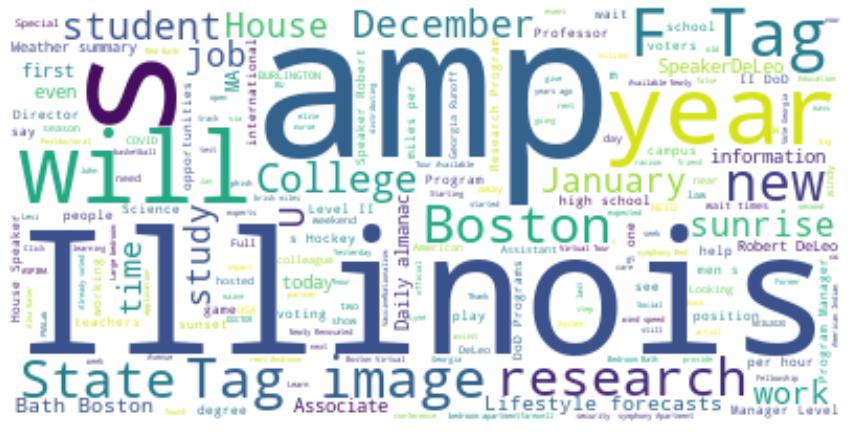

In [241]:
gen_wordcloud(big_df["clean_tweet"],max_words=500)

# Positve sentiment wordcloud

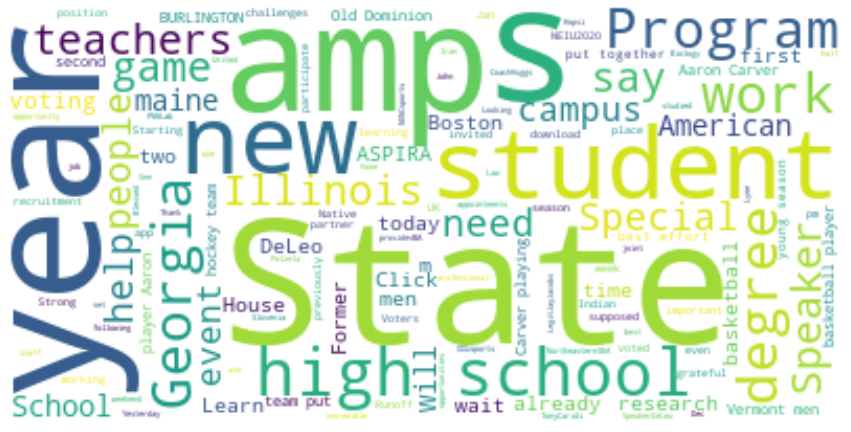

In [242]:
gen_wordcloud(big_df[(big_df["vader_sentiment"] == big_df["textblob_sentiment"]) &\
                     (big_df["textblob_sentiment"] == "positive")]["clean_tweet"], max_words=500)

The words that seem to dominate positve sentiment seem to be related to the history of the university. Others include being the first to organize somethings

In [280]:
pos_df = big_df[(big_df["vader_sentiment"] == big_df["textblob_sentiment"]) &\
                     (big_df["textblob_sentiment"] == "positive")]
pos_df = pos_df.sort_values(by="vader_result", key=lambda x: x.apply(lambda a: a["compound"]),ascending=False)
pos_df.head()

,index,tweet_txt,clean_tweet,vader_result,textblob_result,vader_sentiment,textblob_sentiment
134,202,Thank you @SpeakerDeLeo for your 3 decades of ...,Thank you @SpeakerDeLeo for your 3 decades of ...,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...","{'polarity': 0.6333333333333333, 'subjectivity...",positive,positive
26,45,RT @ThomasConnors: Who's been to Northeastern ...,Who's been to Northeastern University lately? ...,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp...","{'polarity': 0.4125, 'subjectivity': 0.8375}",positive,positive
192,319,Drove 13 hours back to MA from IN yesterday. Q...,Drove 13 hours back to MA from IN yesterday. Q...,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...","{'polarity': 0.21805555555555556, 'subjectivit...",positive,positive
44,67,@CleXenoMenes @BuckeyevsTworld “I have an Ivy ...,@CleXenoMenes @BuckeyevsTworld “I have an Ivy ...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...","{'polarity': 0.5, 'subjectivity': 0.5}",positive,positive
195,327,RT @RakendrickD1: Blessed to say that I’ve rec...,Blessed to say that I’ve received my first off...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...","{'polarity': 0.3125, 'subjectivity': 0.3333333...",positive,positive


## Top 5 positive tweets 

In [285]:
pos_df.head(5)["tweet_txt"].to_list()

['Thank you @SpeakerDeLeo for your 3 decades of service to the House of Representatives and the people of Massachusetts. I am privileged to have had the opportunity to work with you on many important issues. I wish you all the best at Northeastern University. https://t.co/g519giD8hT',
 "RT @ThomasConnors: Who's been to Northeastern University lately? That place is beautiful, lovely paths with nice lighting &amp; literally a coy…",
 'Drove 13 hours back to MA from IN yesterday. Quick trip into Boston for a COVID19 test this morning thanks to @Northeastern University. 🦠 \n\nSo grateful for the simple, free, accessible, + transparent approach NU has taken to #highered during a #pandemic. 🙌🏼',
 '@CleXenoMenes @BuckeyevsTworld “I have an Ivy League degree” Guess I’m supposed to be impressed. I went to and played basketball at Northeastern University and have a degree in computer network and security, 3 IT certifications and am living rather comfortably in suburban Atlanta.',
 'RT @Rakendric

# Negative sentiment word cloud

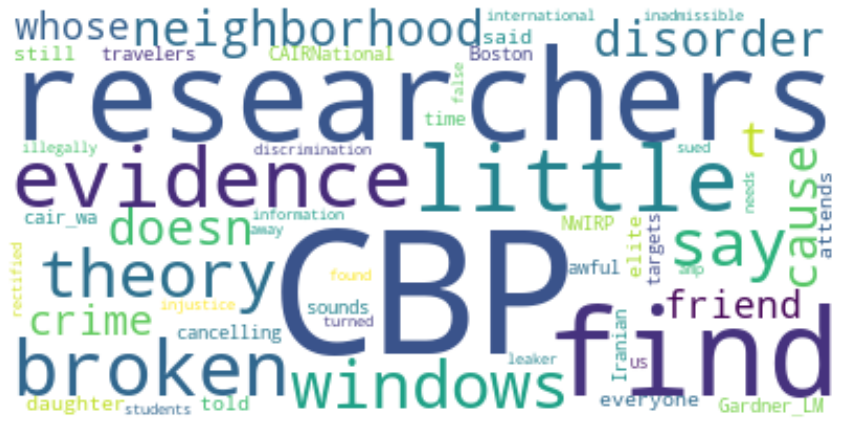

In [243]:
gen_wordcloud(big_df[(big_df["vader_sentiment"] == big_df["textblob_sentiment"]) &\
                     (big_df["textblob_sentiment"] == "negative")]["clean_tweet"], max_words=500)

There are only 3 tweets that were categorized as negative and the last two do seem like a negative sentiment. Although the first tweet is somewhat neutral, the words 'broken' and 'doesn't ' might have contributed to the negativity

In [283]:
neg_df = big_df[(big_df["vader_sentiment"] == big_df["textblob_sentiment"]) &\
                     (big_df["textblob_sentiment"] == "negative")]
neg_df = neg_df.sort_values(by="vader_result", key=lambda x: x.apply(lambda a: -a["compound"]),ascending=False)
neg_df.head(5)

,index,tweet_txt,clean_tweet,vader_result,textblob_result,vader_sentiment,textblob_sentiment
56,79,Northeastern University researchers find littl...,Northeastern University researchers find littl...,"{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...","{'polarity': -0.29375, 'subjectivity': 0.45}",negative,negative
111,148,@CAIRNational @cair_wa @NWIRP @CBP @Gardner_LM...,@CAIRNational @cair_wa @NWIRP @CBP @Gardner_LM...,"{'neg': 0.092, 'neu': 0.908, 'pos': 0.0, 'comp...","{'polarity': -0.30000000000000004, 'subjectivi...",negative,negative
64,91,I have a friend whose daughter attends an elit...,I have a friend whose daughter attends an elit...,"{'neg': 0.137, 'neu': 0.771, 'pos': 0.091, 'co...","{'polarity': -0.5625, 'subjectivity': 0.6875}",negative,negative


In [284]:
neg_df["tweet_txt"].to_list()

['Northeastern University researchers find little evidence for ‘broken windows theory,’ say neighborhood disorder doesn’t cause crime https://t.co/dHSeDRfQOU',
 '@CAIRNational @cair_wa @NWIRP @CBP @Gardner_LM Iranian travelers to Boston were also targets of discrimination.They were illegally found inadmissible to the US &amp; false information was leaker by #CBP about some international students turned away when they were sued. This injustice needs to be rectified. https://t.co/Gi1hrPYoQs',
 'I have a friend whose daughter attends an elite northeastern university and he told me she said everyone there is still cancelling each other all the time. It sounds awful.']

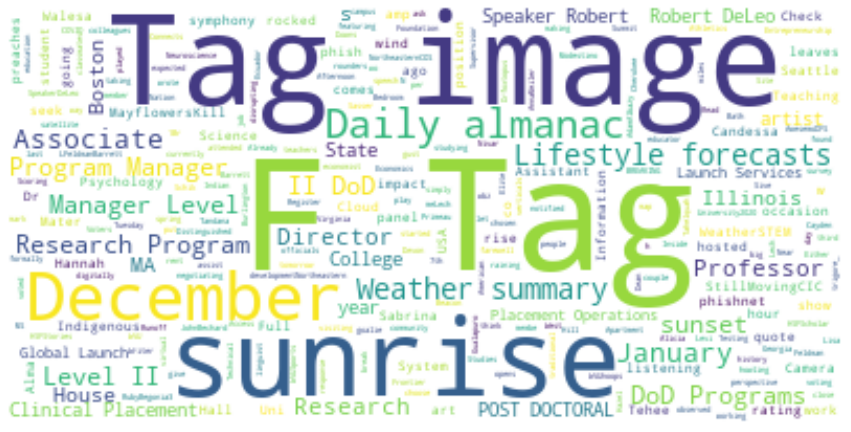

In [244]:
gen_wordcloud(big_df[(big_df["vader_sentiment"] == big_df["textblob_sentiment"]) &\
                     (big_df["textblob_sentiment"] == "neutral")]["clean_tweet"], max_words=500)

# Analyzing tweets that resulted in differing sentiments

In [246]:
anomalous_df = big_df[(big_df["vader_sentiment"] != big_df["textblob_sentiment"]) &\
                     (big_df["textblob_sentiment"] != "neutral") &\
      (big_df["vader_sentiment"] != "neutral")]

In [251]:
anomalous_df["vader_compound"] = anomalous_df["vader_result"].apply(lambda x: x["compound"]) 

C:\Users\abhil\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
anomalous_df

,index,tweet_txt,clean_tweet,vader_result,textblob_result,vader_sentiment,textblob_sentiment,vader_compound
6,6,RT @HaydenHarmon11: This past year working wit...,This past year working with Oklahoma State foo...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...","{'polarity': -0.08333333333333333, 'subjectivi...",positive,negative,0.2500
24,41,Thank you to the team from the Alpha Phi Omega...,Thank you to the team from the Alpha Phi Omega...,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...","{'polarity': -0.4, 'subjectivity': 0.4}",positive,negative,0.7506
98,132,Northeastern/symphony Apartment for rent 1 Bed...,Northeastern/symphony Apartment for rent 1 Bed...,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...","{'polarity': 0.325, 'subjectivity': 0.625}",negative,positive,-0.5267
99,133,In 1929 the Y purchased the old Red Sox field ...,In 1929 the Y purchased the old Red Sox field ...,"{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'comp...","{'polarity': 0.11666666666666665, 'subjectivit...",negative,positive,-0.4215
112,149,RT @Arcep: #netneutrality Arcep launches a new...,netneutrality Arcep launches a new version of ...,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...","{'polarity': 0.13636363636363635, 'subjectivit...",negative,positive,-0.3818
197,329,RT @securityPNNL: .@NU_Seattle is a valuable p...,.@NU_Seattle is a valuable partner for @PNNLab...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...","{'polarity': -0.1, 'subjectivity': 0.1}",positive,negative,0.6369
200,334,RT @AlumniNU: To combat racism &amp; create me...,To combat racism &amp; create meaningful refor...,"{'neg': 0.332, 'neu': 0.47, 'pos': 0.198, 'com...","{'polarity': 0.09999999999999999, 'subjectivit...",negative,positive,-0.7184


In [252]:
anomalous_df["tweet_txt"].to_list()

['RT @HaydenHarmon11: This past year working with Oklahoma State football has been a childhood dream. Starting next week I will be the Assist…',
 'Thank you to the team from the Alpha Phi Omega fraternity of Northeastern University for helping to hold a rousing bingo game with the guests of Woods Mullen Shelter, and even staying to help serve lunch afterwards.\n#YoungPeopleMakingADifference https://t.co/2io0Cv4O9n',
 'Northeastern/symphony Apartment for rent 1 Bedroom 1 Bath Boston - $1,850: $2,450/ 1Br-Near Symphony and Northeastern University, No Charge Available 9/1 No Broker Charge Heat and hot water included in rent… https://t.co/t8rbiqyt3g #symphonyapartments #apartmentsnearsymphony https://t.co/sQ1L281ixQ',
 'In 1929 the Y purchased the old Red Sox field on Huntington Avenue and broke ground for the first university in the U.S. based on the work-study concept — now known as Northeastern University. @Johnny_LBI  @AnneMcCarthy #northeasternuniversity',
 'RT @Arcep: #netneutrality 

- The Retweets often have the original tweet truncated in the body of the text this leads to the tweet being classified on incomplete data
- Also the tweet about the Ad for a room mentions no broker charge and no Charge - these would have contributed to the vader analyzer categorizing this as negative
- Upon manual inspection, all these tweets would be categorized as neutral 